-----------------------------------------------------------------------
<font size=6 color="#36454F"><b>Capstone: Unsupervised  Learning Final Notebook</b></font><br><br>
by: Ted Summey
***

<font size=4 color="#6A5ACD"><b>Problem Statement:</b></font><br><br>
<font size=5 color="#FF00FF"><b>Marketing-to-sales conversion rates are impacting revenue and growth</b></font>

---
<font size=5 color="#483D8B"><b>Problem Formulation and Resolution Proposal</b></font>
***

<font size=4 color="#6A5ACD"><b>Context</b></font>
***
A marketing strategy is a business game plan for reaching prospective consumers and generating sales. Placing the right product and messaging in front of the right prospect requires understanding customer characteristics and behaviors. Customer insights drive the creation and deployment of effective campaigns with the highest customer response percentage, leading to increased sales.

<font size=4 color="#6A5ACD"><b>Objective</b></font>
***
The goal is to understand the problem by analyzing existing marketing data to identify critical insights around customer characteristics and habits, spending and purchase patterns, and then segment customers into groups with similar traits. Insights could potentially lead to data-driven recommendations for marketing activities designed to improve customer response and acceptance driving higher revenues and growth.

<font size=4 color="#6A5ACD"><b>Data Analytics Process</b></font>
***
<ol>
    <li>Load data exploration, processing, analytic, and visualization libraries</li>
    <li>Load the marketing dataset</li>
    <li>Explore and gain an understanding of the dataset</li>
    <li>Univariate Analysis: Look for insights consisting of similarities and variables to remove and/or create</li>
    <li>Process the data (impute missing values, remove unneccessary data, create new columns to add insight</li>
    <li>Describe the data</li>
    <li>Look for correlations</li>
    <li>Scale and prepare the data for deeper analytics</li>
    <li>Apply Principal Component Analysis</li>
    <li>Apply T-SNE</li>
    <li>Apply K-Means</li>
    <li>Apply K-Medoid</li>
    <li>Conclude the analysis</li>
</ol>

<font size=4 color="#6A5ACD"><b>Problem Formulation Summary</b></font>
***
Data Analytics uses analytical methods and techniques to understand the data and hidden insights, such as:
<ul>
    <li>Identify groups of customers with similar traits.</li>
    <li>Determine how groups with different characteristics respond to previous marketing activities.</li>
    <li>Identify correlations between customer acceptance of products and channels.</li>
    <li>Use the new insights to create or update current marketing activities.</li>
</ul>

<font size=4 color="#6A5ACD"><b>Key Questions</b></font>
***
Data Science can be used to help improve marketing campaigns by answering the follow questions:
<ul>
    <li>Do relationships already exist in the data?</li>
    <li>Can new columns be created to add additional or better insights?</li>
    <li>What characteristics are revealed when analyzing data details?</li>
    <li>How does customer traits impact the performance of campaigns?</li>
    <li>What will data correlation reveal about groups/profiles?</li>
    <li>How can customer segmentation/profiles be further defined using different clustering techniques?</li>
    <li>Finally, how to discovered insights be used to build new marketing campaigns</li>
</ul>

<font size=4 color="#6A5ACD"><b>Data Description</b></font>
***
Marketing provided a dataset from the assumed year 2016.The dataset contains the following features:
<ol>
    <li>ID: Unique ID of each customer</li>
    <li>Year_Birth: Customer’s year of birth</li>
    <li>Education: Customer's level of education    </li>
    <li>Marital_Status: Customer's marital status</li>
    <li>Kidhome: Number of small children in customer's household</li>
    <li>Teenhome: Number of teenagers in customer's household</li>
    <li>Income: Customer's yearly household income in USD</li>
    <li>Recency: Number of days since the last purchase</li>
    <li>Dt_Customer: Date of customer's enrollment with the company</li>
    <li>MntFishProducts: The amount spent on fish products in the last 2 years</li>
    <li>MntMeatProducts: The amount spent on meat products in the last 2 years</li>
    <li>MntFruits: The amount spent on fruits products in the last 2 years</li>
    <li>MntSweetProducts: Amount spent on sweet products in the last 2 years</li>
    <li>MntWines: The amount spent on wine products in the last 2 years</li>
    <li>MntGoldProds: The amount spent on gold products in the last 2 years</li>
    <li>NumDealsPurchases: Number of purchases made with discount</li>
    <li>NumCatalogPurchases: Number of purchases made using a catalog (buying goods to be shipped through the mail)</li>
    <li>NumStorePurchases: Number of purchases made directly in stores</li>
    <li>NumWebPurchases: Number of purchases made through the company's website</li>
    <li>NumWebVisitsMonth: Number of visits to the company's website in the last month</li>
    <li>AcceptedCmp1: 1 if customer accepted the offer in the first campaign, 0 otherwise</li>
    <li>AcceptedCmp2: 1 if customer accepted the offer in the second campaign, 0 otherwise</li>
    <li>AcceptedCmp3: 1 if customer accepted the offer in the third campaign, 0 otherwise</li>
    <li>AcceptedCmp4: 1 if customer accepted the offer in the fourth campaign, 0 otherwise</li>
    <li>AcceptedCmp5: 1 if customer accepted the offer in the fifth campaign, 0 otherwise</li>
    <li>Response: 1 if customer accepted the offer in the last campaign, 0 otherwise</li>
    <li>Complain: 1 If the customer complained in the last 2 years, 0 otherwise</li>
</ol>

---
<font size=5 color="#483D8B"><b>Load Data Analytic Libraries and Marketing Dataset</b></font>
***

<font size=3><b>Load Data Analytics Libraries</b></font>

In [8]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

# To encode the variable
from sklearn.preprocessing import LabelEncoder

# Importing PCA for Linear analytics
from sklearn.decomposition import PCA

# Importing TSNE for non-linear analytics
from sklearn.manifold import TSNE

# Importing K-Means for cluster by mean values with lowest distances
from sklearn.cluster import KMeans

# To import K-Medoids for clustering by data point centroid with least variance
from sklearn_extra.cluster import KMedoids

<font size=3><b>Load Marketing Dataset</b></font>

In [9]:
# loading the dataset
data = pd.read_csv("marketing_campaign.csv")

---
<font size=5 color="#483D8B"><b>Data Exploration and Analysis</b></font>
***

<font size=4 color="#6A5ACD"><b>Data Exploration</b></font>
***

In [10]:
# Check the shape of the data
data.shape

(2240, 27)

In [11]:
# Check the datatypes of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [12]:
# Check for unique values high enough to drop adding little or no value to data analytics.
data.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Response                  2
dtype: int64

In [13]:
# Find the percentage of missing values in each column
(data.isnull().sum()/data.shape[0] * 100)

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Response               0.000000
dtype: float64

<div class="alert alert-block alert-info">
    <font size=4 color=black><b>Data Exploration Observations and Insights:</b></font><br>
    <ul>
        <li>There are 2240 observations (rows) and 27 features (columns)</li>
        <li>There are 3 categorical variables, the rest are numberical</li>
        <li>The categorical variables are Education, Marital_Status, and Dt_Customer</li>
        <li>Income in the only column with missing values, the percent of missing values is 1.07%</li>
        <li>Impute the missing values in the Income column with the mean value from Income</li>
        <li>ID has all unique values and will be dropped</li>       
    </ul>
</div>

<font size=4 color="#6A5ACD"><b>Data Analysis</b></font>
***

<font size=3><b>Numeric Column Analysis</b></font>

In [14]:
#Summary statistics for numerical columns
numerical_columns = [
    'Year_Birth',
    'Income',
    'MntWines',
    'MntFruits',
    'MntMeatProducts',
    'MntFishProducts',
    'MntSweetProducts',
    'MntGoldProds',
    'NumDealsPurchases',
    'NumWebPurchases',
    'NumCatalogPurchases',
    'NumStorePurchases',
    'NumWebVisitsMonth',
    'Recency']
data[numerical_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0
MntSweetProducts,2240.0,27.062946,41.280498,0.0,1.00,8.0,33.00,263.0
MntGoldProds,2240.0,44.021875,52.167439,0.0,9.00,24.0,56.00,362.0
NumDealsPurchases,2240.0,2.325000,1.932238,0.0,1.00,2.0,3.00,15.0
NumWebPurchases,2240.0,4.084821,2.778714,0.0,2.00,4.0,6.00,27.0


<div class="alert alert-block alert-info">
    <font size=4 color=black><b>Numeric Column Observations and Insights:</b></font><br>
    <ul>
        <li>The average birth years is ~1968</li>
        <li>Create a new column "Age" and calculate the Age then drop the "Year_Birth" column</li>
        <li>Average customer income is ~52,000</li>
        <li>Wine is purchased most often, Fruit is purchased lease often</li>
        <li>Store is the mosted used channel for purchases</li>
        <li>The average number of days between purchases is ~49</li>
        <li>~50 percent of customer visiting the website make a purchase</li>
        <li>~9 numeric columns have a significant gap between the 75th quartile and the max value indicating a right-skewed distribution with possible outliers</li>
        <li>Create the variable "Total_Purchases" for better insight in total customer purchases</li>
        <li>Create the variable "Total_Spending" for better insight in total customer spending</li>
    </ul>
</div>

<font size=3><b>Categorical Column Analysis</b></font>

In [15]:
# List of the categorical columns in the data
categorical_columns = ['Education', 'Marital_Status']

# Number of unique observations in each category
for column in categorical_columns:
    print("-" * 38)
    print("Unique values in", column, "are :")
    print(" ")
    print(data[column].value_counts(normalize = True))
    print("-" * 38)
    print(" \n")

--------------------------------------
Unique values in Education are :
 
Graduation    0.503125
PhD           0.216964
Master        0.165179
2n Cycle      0.090625
Basic         0.024107
Name: Education, dtype: float64
--------------------------------------
 

--------------------------------------
Unique values in Marital_Status are :
 
Married     0.385714
Together    0.258929
Single      0.214286
Divorced    0.103571
Widow       0.034375
Alone       0.001339
Absurd      0.000893
YOLO        0.000893
Name: Marital_Status, dtype: float64
--------------------------------------
 



<div class="alert alert-block alert-info">
    <font size=4 color=black><b>Categorical Column Observations and Insights:</b></font><br>
    <ul>
        <li>Graduation is the highest Education variable, basic is the lowest</li>
        <li>The Education variables Master and 2n Cycle are the same and can be combined</li>
        <li>Married is the highest Marital_Status variable, YOLO and Absurd are the lowest</li>
        <li>Create a new column "Relationship" and combine "Married" and "Together" into "Relationship"</li>
        <li>Combine "Alone" and "Single" into the "Single" variable</li>
        <li>Create a new variable "Other" and combine "YOLO" and "Absurd" into "Other"</li>
    </ul>
</div>

<font size=3><b>Boolean Column Analysis</b></font>

In [16]:
#Summary statistics for boolean columns
boolean_columns = [
    'Kidhome',
    'Teenhome',
    'AcceptedCmp1',
    'AcceptedCmp2',
    'AcceptedCmp3',
    'AcceptedCmp4',
    'AcceptedCmp5',
    'Response',
    'Complain']
data[boolean_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
Kidhome,2240.0,0.444196,0.538398,0.0,0.0,0.0,1.0,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.0,0.0,1.0,2.0
AcceptedCmp1,2240.0,0.064286,0.245316,0.0,0.0,0.0,0.0,1.0
AcceptedCmp2,2240.0,0.012946,0.113069,0.0,0.0,0.0,0.0,1.0
AcceptedCmp3,2240.0,0.072768,0.259813,0.0,0.0,0.0,0.0,1.0
AcceptedCmp4,2240.0,0.074554,0.262728,0.0,0.0,0.0,0.0,1.0
AcceptedCmp5,2240.0,0.072768,0.259813,0.0,0.0,0.0,0.0,1.0
Response,2240.0,0.149107,0.356274,0.0,0.0,0.0,0.0,1.0
Complain,2240.0,0.009375,0.096391,0.0,0.0,0.0,0.0,1.0


<div class="alert alert-block alert-info">
    <font size=4 color=black><b>Boolean Column Observations and Insights:</b></font><br>
    <ul>
        <li>Most customers don't have children at home</li>
        <li>Marketing campaign 4 is the most accepted, campaign 2 is the least accepted</li>
        <li>Average complaints is less that 1%, this column will be dropped</li>
        <li>On average, there is a ~14.9 percent customer offer acceptance rate</li>
        <li>Create "Children" column from Kidhome and Teenhome Columns, then drop Kidhome and Teenhome columns</li>
        <li>Create "Total_Campaigns_Accepted" column for better insight into customer campaign acceptance</li>
    </ul>
</div>

---
<font size=5 color="#483D8B"><b>Data Processing</b></font>
***

<font size=3><b>Dropping Columns: ID and Complain</b></font>

In [17]:
# Dropping ID column: "ID has all unique values and will be dropped"
data.drop(columns = "ID", inplace = True)

# Dropping Complain column: "Average complaints is less that 1%, this column will be dropped"
data.drop(columns = "Complain", inplace = True)

<font size=3><b>Creating Age column and dropping Year_Birth</b></font>

In [18]:
# Age offers more insight than Year_Birth
# Extract only the year from the Year_Birth variable and subtracting it from 2016 to create "Age"
# This is the customer age in 2016 when the data was collected
data['Age'] = 2016 - pd.to_datetime(data['Year_Birth'], format="%Y").apply(lambda x: x.year)

# Dropping Year_Birth column: "Create a new column "Age" and calculate the Age then drop the "Year_Birth" column"
data.drop(columns = "Year_Birth", inplace = True)

<font size=3><b>Create New Columns: Better Insight</b></font>

In [19]:
# Better Insights: Total customer spending across all products
ttl_spending = [col for col in data.columns if 'Mnt' in col]
data['Total_Spending'] = data[ttl_spending].sum(axis = 1)

# Better Insights: Total customer spending across all products
ttl_purchases = [col for col in data.columns if 'Purchases' in col]
data['Total_Purchases'] = data[ttl_purchases].sum(axis = 1)

# Better Insights: Total number of offers accepted by a customer
campaigns_cols = [col for col in data.columns if 'Cmp' in col]
data['Total_Campaigns_Accepted'] = data[campaigns_cols].sum(axis = 1)

<font size=3><b>Creating Children column and dropping Teenhome and Kidhome columns</b></font>

In [20]:
# Customers that have children at home
data['Children'] = data['Teenhome'] + data['Kidhome']

# Dropping Teenhome and Kidhome columns
data.drop(columns = "Kidhome", inplace = True)
data.drop(columns = "Teenhome", inplace = True)

<font size=3><b>Creating Relationship variable under Marital_Status combining Married and Together variables</b></font>

In [21]:
#Better Insights: Create Relationship variable
data['Marital_Status'].replace(['Married', 'Together'], 'Relationship', inplace = True) 

<font size=3><b>Impute missing Income values with the mean of the Income column</b></font>

In [22]:
# Impute 24 missing values with the median
data['Income'].fillna(data.Income.median(), inplace = True)

In [23]:
# Check the shape of the data
data.shape

(2240, 27)

In [24]:
# Verifying there are no missing values
data.isnull().sum()

Education                   0
Marital_Status              0
Income                      0
Dt_Customer                 0
Recency                     0
MntWines                    0
MntFruits                   0
MntMeatProducts             0
MntFishProducts             0
MntSweetProducts            0
MntGoldProds                0
NumDealsPurchases           0
NumWebPurchases             0
NumCatalogPurchases         0
NumStorePurchases           0
NumWebVisitsMonth           0
AcceptedCmp3                0
AcceptedCmp4                0
AcceptedCmp5                0
AcceptedCmp1                0
AcceptedCmp2                0
Response                    0
Age                         0
Total_Spending              0
Total_Purchases             0
Total_Campaigns_Accepted    0
Children                    0
dtype: int64

<div class="alert alert-block alert-info">
    <font size=4 color=black><b>Data Processing Observations and Insights:</b></font><br>
    <ul>
        <li>Data has the same number of rows but one less column.</li>
        <li>Four new columns were created for better insight</li>
        <li>Five columns were deleted</li>
        <li>There are no missing values in the dataset</li>
        <li>Data is ready for analytics</li>
    </ul>
</div>

---
<font size=5 color="#483D8B"><b>Data Analytics</b></font>
***

<font size=4 color="#6A5ACD"><b>Univariate Analysis</b></font>
***

Age
Skew : 0.35


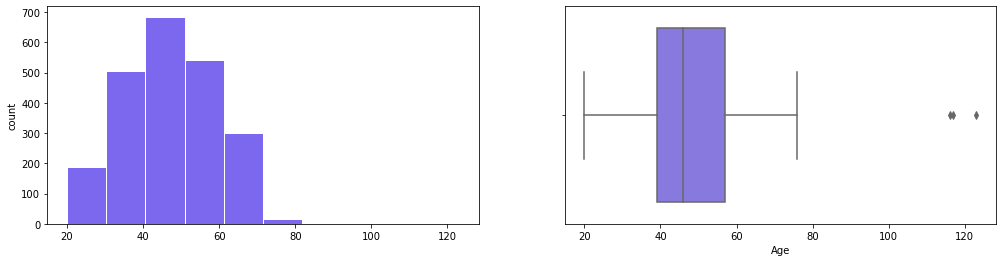

Income
Skew : 6.8


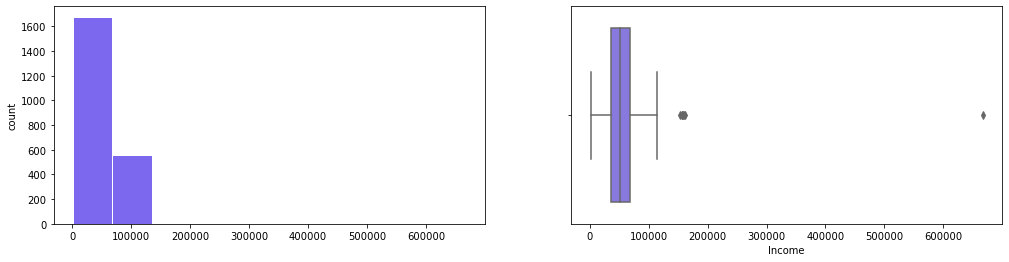

Total_Purchases
Skew : 0.25


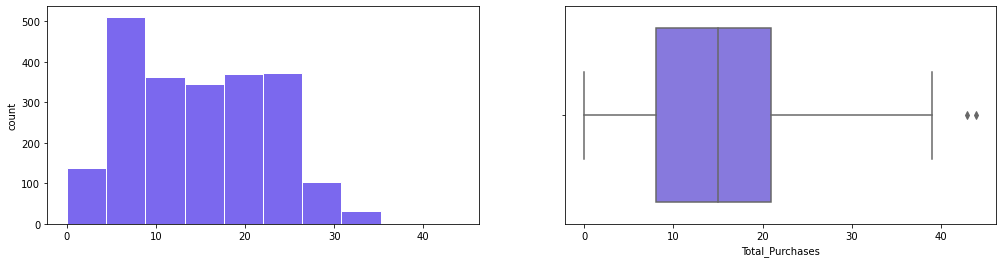

Total_Spending
Skew : 0.86


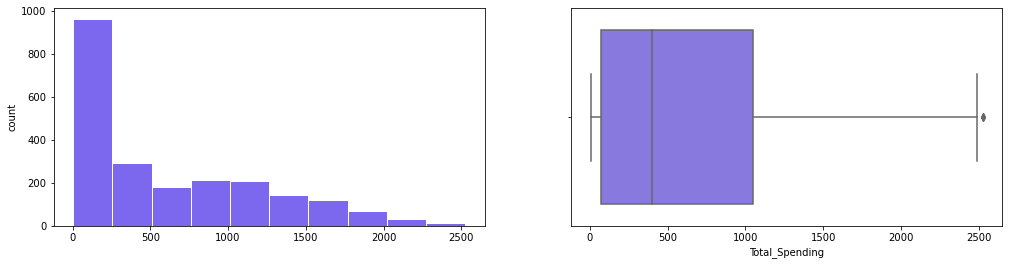

MntWines
Skew : 1.18


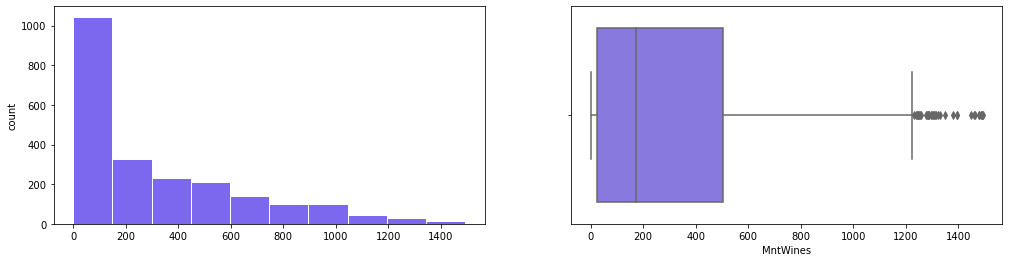

MntFruits
Skew : 2.1


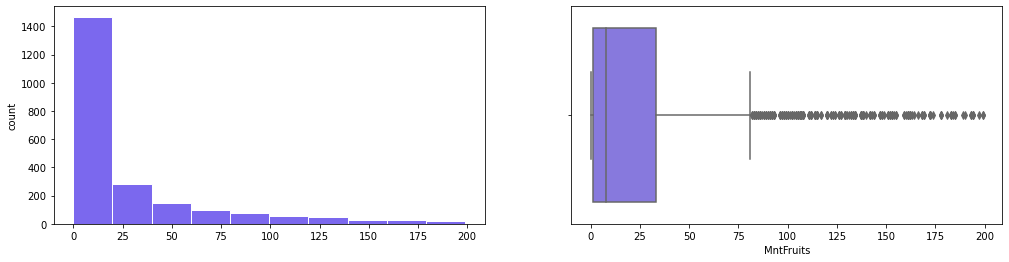

MntMeatProducts
Skew : 2.08


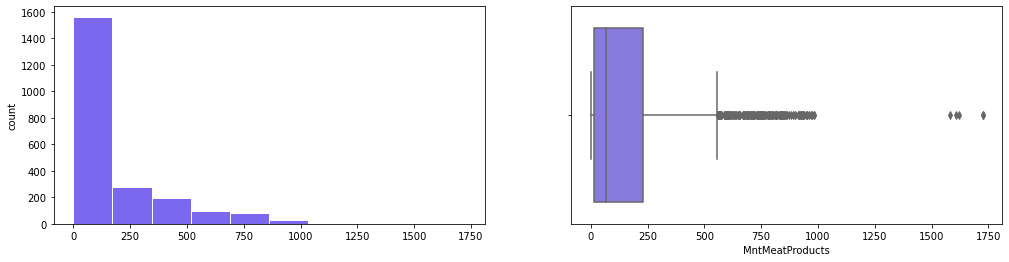

MntFishProducts
Skew : 1.92


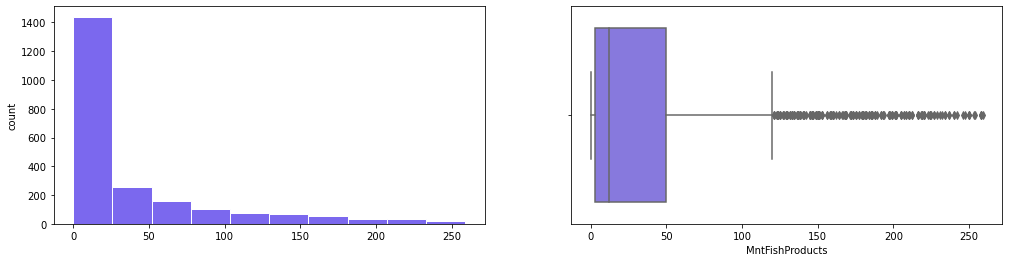

MntSweetProducts
Skew : 2.14


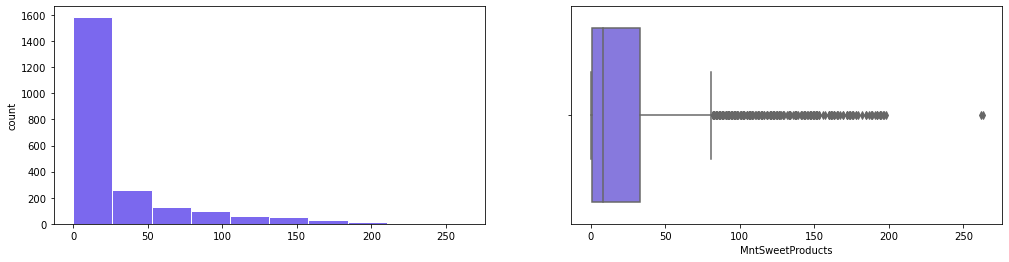

MntGoldProds
Skew : 1.89


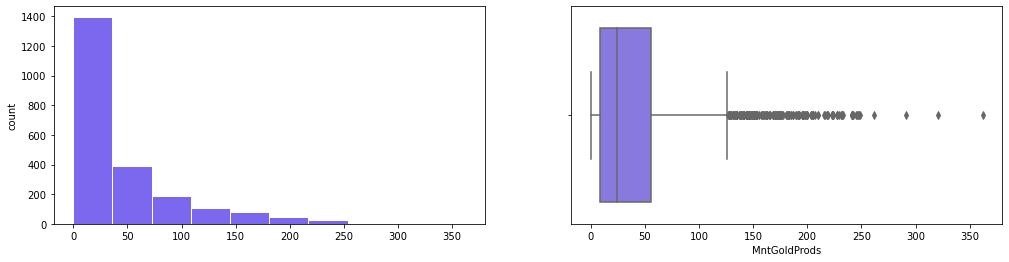

NumDealsPurchases
Skew : 2.42


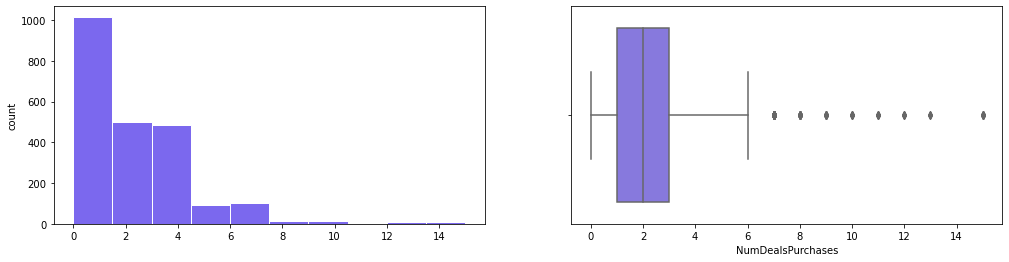

NumWebPurchases
Skew : 1.38


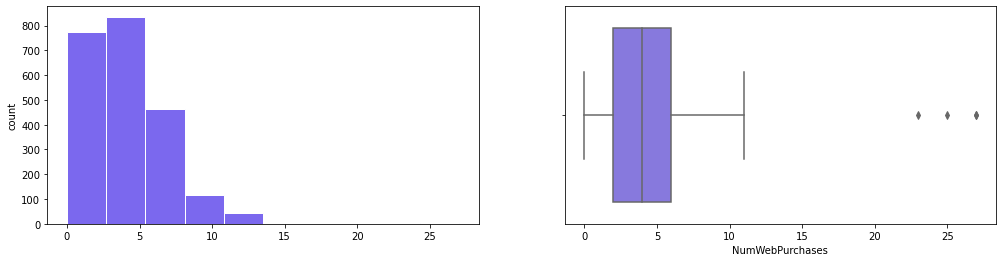

NumCatalogPurchases
Skew : 1.88


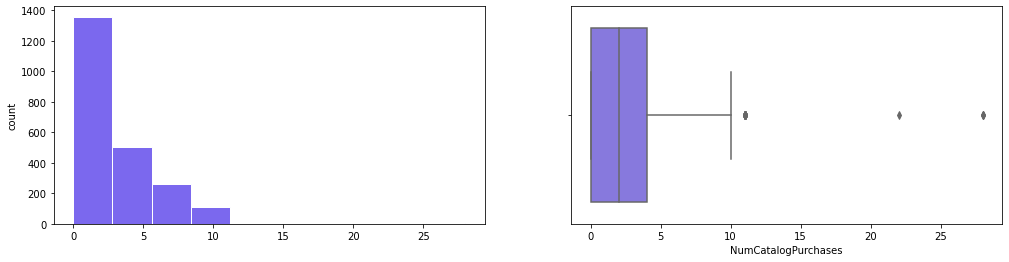

NumStorePurchases
Skew : 0.7


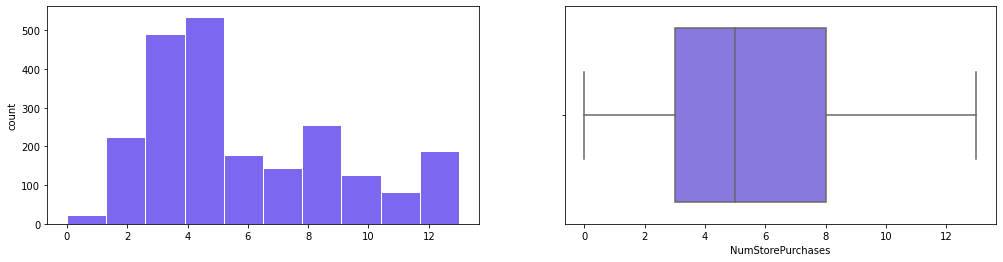

NumWebVisitsMonth
Skew : 0.21


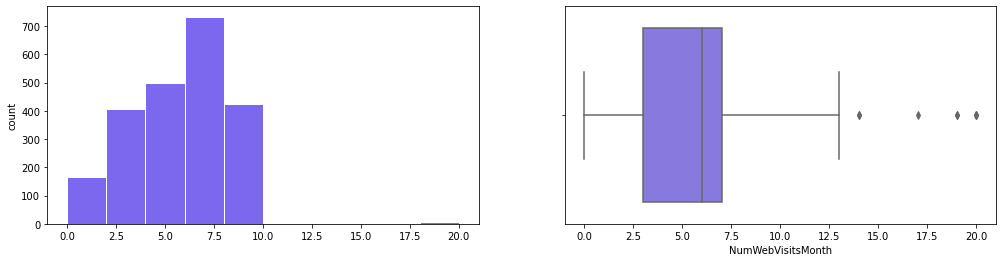

Recency
Skew : -0.0


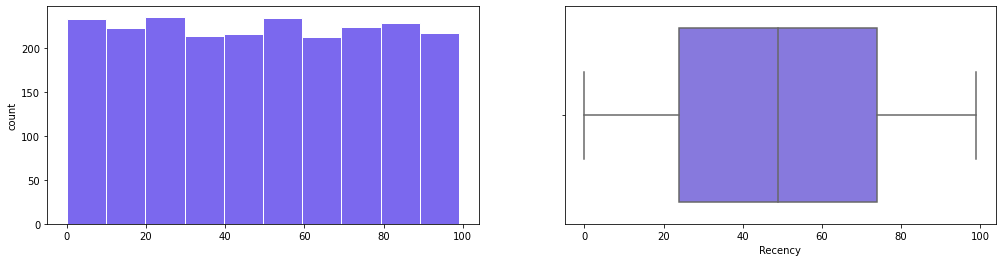

Total_Campaigns_Accepted
Skew : 2.71


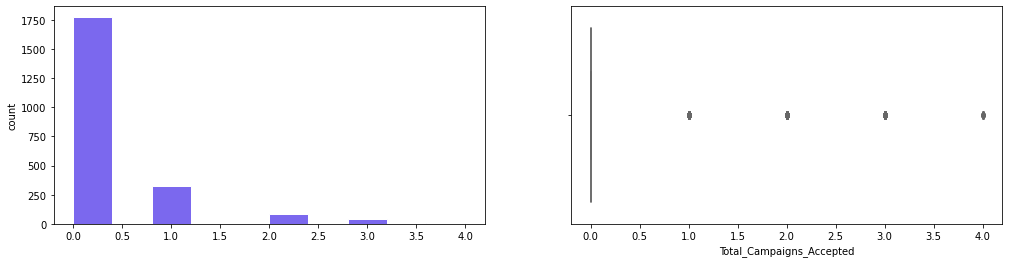

In [25]:
# Plotting the histogram and boxplot for numerical variables
numerical_columns = ['Age',
                     'Income',
                     'Total_Purchases',
                     'Total_Spending',
                     'MntWines',
                     'MntFruits',
                     'MntMeatProducts',
                     'MntFishProducts',
                     'MntSweetProducts',
                     'MntGoldProds',
                     'NumDealsPurchases',
                     'NumWebPurchases',
                     'NumCatalogPurchases',
                     'NumStorePurchases',
                     'NumWebVisitsMonth',
                     'Recency',
                     'Total_Campaigns_Accepted']
for col in numerical_columns:
    print(col)
    print('Skew :',round(data[col].skew(),2))
    plt.figure(figsize = (17, 4))
    plt.subplot(1, 2, 1)
    data[col].hist(bins = 10, grid = False, color = '#7B68EE', ec = 'white')
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x = data[col], color = '#7B68EE')
    plt.show()

<font size=3><b>Remove rows outside the 99.5 percentile</b></font>

In [26]:
# Check the 99.5 percentile for low numbers of extreme outliers
low_extreme_outliers = ['Age',
                'Income',
                'Total_Purchases',
                'Total_Spending',
                'MntWines',
                'MntSweetProducts',
                'MntGoldProds',
                'NumDealsPurchases',
                'NumWebPurchases',
                'NumCatalogPurchases',
                'NumWebVisitsMonth']

for col in low_extreme_outliers:
    print('The 99.5 percentile of',col,' is:',round(data.quantile(q=0.995)[col],2), '\n')

The 99.5 percentile of Age  is: 72.8 

The 99.5 percentile of Income  is: 102122.95 

The 99.5 percentile of Total_Purchases  is: 33.0 

The 99.5 percentile of Total_Spending  is: 2274.71 

The 99.5 percentile of MntWines  is: 1373.15 

The 99.5 percentile of MntSweetProducts  is: 191.8 

The 99.5 percentile of MntGoldProds  is: 241.0 

The 99.5 percentile of NumDealsPurchases  is: 12.0 

The 99.5 percentile of NumWebPurchases  is: 11.0 

The 99.5 percentile of NumCatalogPurchases  is: 11.0 

The 99.5 percentile of NumWebVisitsMonth  is: 9.8 



In [27]:
# Dropping rows with variables outside the 99.5 percentile
data = data[data.Age < 73]
data = data[data.Income < 103000]
data = data[data.Total_Purchases < 34]
data = data[data.Total_Spending < 2275]
data = data[data.MntWines < 1374]
data = data[data.MntSweetProducts < 192]
data = data[data.MntGoldProds < 242]
data = data[data.NumDealsPurchases < 13]
data = data[data.NumWebPurchases < 12]
data = data[data.NumCatalogPurchases < 12]
data = data[data.NumWebVisitsMonth < 10]

In [28]:
# Check the shape of the data
data.shape

(2153, 27)

<div class="alert alert-block alert-info">
    <font size=4 color=black><b>Univariate Analysis Observations and Insights:</b></font><br>
    <ul>
        <li>Many of the colums have alot of outliers. The cluster technique, K-Means, is sensitive to outliers and this may impact the cluster analysis.</li>
        <li>Columns with less than extreme outliers will have rows removed where outliers are outside the 99.5 percentile</li>
        <li>87 rows with extreme outliers were removed</li>
        <li>There are 2153 rows and 27 columns in the revised dataset</li>
        <li>Customer that purchase the most are between 40 and 50 years of age</li>
        <li>Most customer earn less than ~75k</li>
        <li>More customers spend less than ~$250</li>
        <li>Customers purchase between ~5 and 9 products a month</li>
        <li>Customer most often visit the website ~7 times per month</li>
        <li>Customers purchase ~4+ items from stores, 3 or less items from the catalog, ~3 to 5 web purchase, and takes advantage of 1 deal</li>
    </ul>
</div>

<font size=4 color="#6A5ACD"><b>Bivariate Correlation</b></font>
***

<font size=3><b>Correlation Plot - All Columns</b></font>

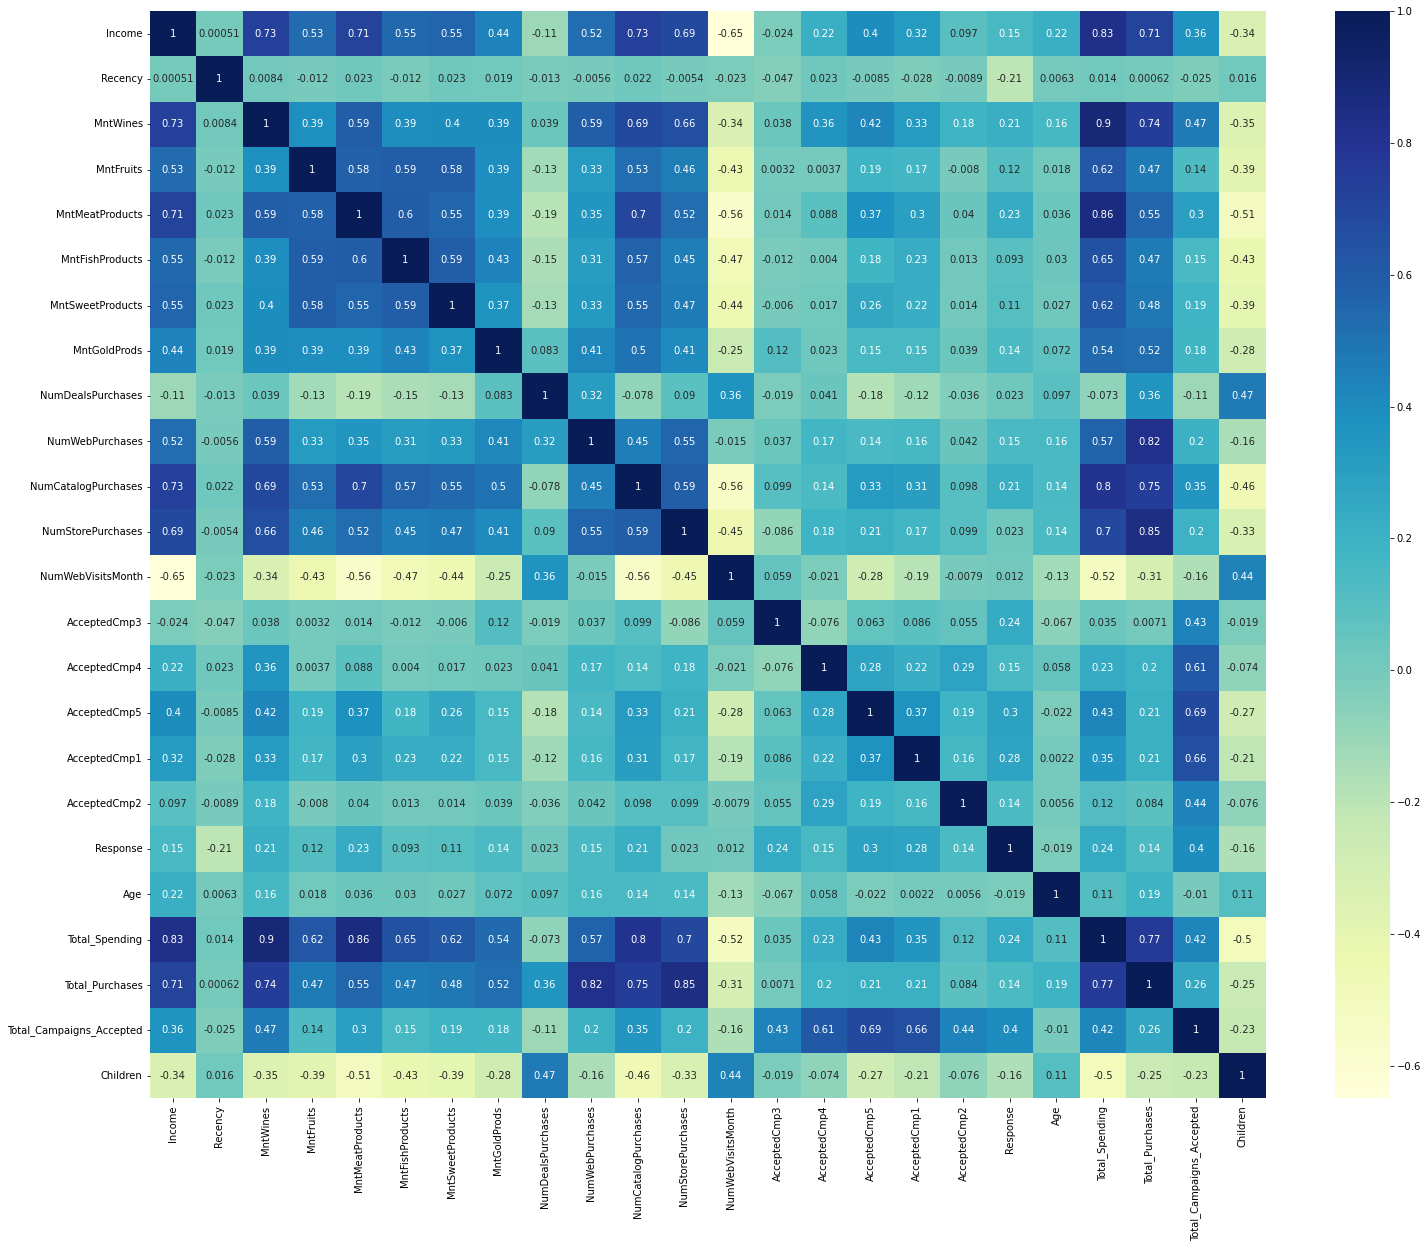

In [29]:
# Plot the correlation of the new data
plt.figure(figsize = (25, 20))

# Giving the correlation plot a different color map (cmap)
sns.heatmap(data.corr(), annot = True, cmap = "YlGnBu")
plt.show()

<font size=3><b>Correlation Plot - Campaigns, Spending, and Income</b></font>

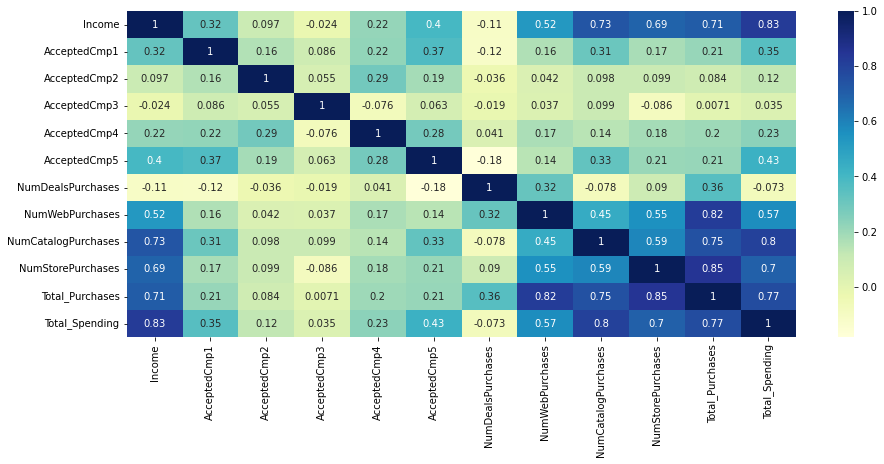

In [30]:
# Plot the correlation for spending and purchases
corr = data[['Income', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'Total_Purchases', 'Total_Spending']].corr()
plt.figure(figsize = (15, 6))

# Giving the correlation plot a different color map (cmap)
sns.heatmap(corr.T, annot = True, cmap = "YlGnBu")
plt.show()

<font size=3><b>Compare campaign performance to the mean income of ~52,000</b></font>

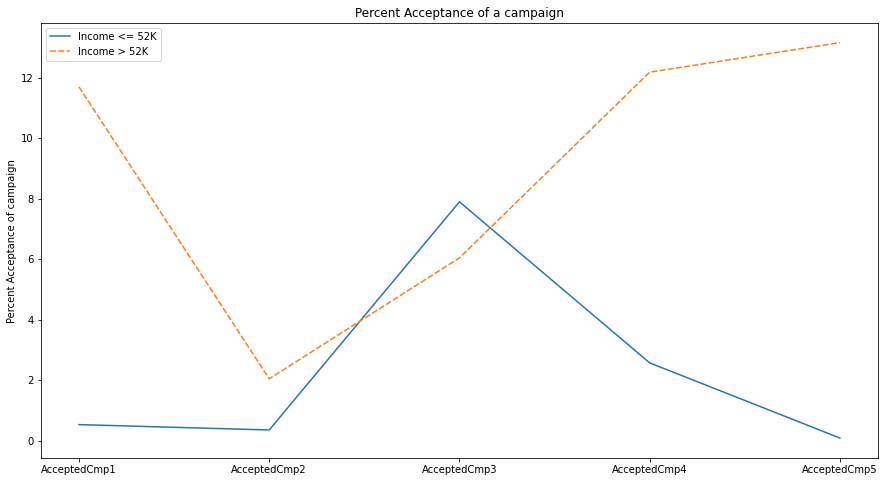

In [31]:
# Looking at campaign success less than or each to the income mean, and greater than the Income mean (52k)
datagt52 = data[data.Income <= 52000]
datalt52 = data[data.Income > 52000]

campaigns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

# Calculating success rate of each campaign for both segments 
success_campaign1 = pd.DataFrame((datagt52[campaigns].sum()/datagt52.shape[0]) * 100, columns = ['Income <= 52K'])
success_campaign2 = pd.DataFrame((datalt52[campaigns].sum()/datalt52.shape[0]) * 100, columns = ['Income > 52K'])
new_combined_data = pd.concat([success_campaign1, success_campaign2], axis = 1)

# Plot
plt.figure(figsize = (15, 8))
sns.lineplot(data = new_combined_data)
plt.title("Percent Acceptance of a campaign")
plt.ylabel("Percent Acceptance of campaign")
plt.show()

<font size=3><b>Check in campaigns are new or current customers</b></font>

In [32]:
# Verify if campaigns are reaching new or current customers

print(data[data['AcceptedCmp1'] == 1].shape)
print(data.groupby('AcceptedCmp1').mean()['Total_Campaigns_Accepted'])
print(data[data['AcceptedCmp2'] == 1].shape)
print(data.groupby('AcceptedCmp2').mean()['Total_Campaigns_Accepted'])
print(data[data['AcceptedCmp3'] == 1].shape)
print(data.groupby('AcceptedCmp3').mean()['Total_Campaigns_Accepted'])
print(data[data['AcceptedCmp4'] == 1].shape)
print(data.groupby('AcceptedCmp4').mean()['Total_Campaigns_Accepted'])
print(data[data['AcceptedCmp5'] == 1].shape)
print(data.groupby('AcceptedCmp5').mean()['Total_Campaigns_Accepted'])

(126, 27)
AcceptedCmp1
0    0.169709
1    1.968254
Name: Total_Campaigns_Accepted, dtype: float64
(25, 27)
AcceptedCmp2
0    0.244831
1    2.840000
Name: Total_Campaigns_Accepted, dtype: float64
(151, 27)
AcceptedCmp3
0    0.198801
1    1.284768
Name: Total_Campaigns_Accepted, dtype: float64
(154, 27)
AcceptedCmp4
0    0.166583
1    1.681818
Name: Total_Campaigns_Accepted, dtype: float64
(136, 27)
AcceptedCmp5
0    0.160635
1    1.970588
Name: Total_Campaigns_Accepted, dtype: float64


<div class="alert alert-block alert-info">
    <font size=4 color=black><b>Bivariate Analysis Observations and Insights:</b></font><br>
    <ul>
        <li>Income correlated with best with total spending and purchases of wine and meats</li>
        <li>Customer purchased wine from all channels (doesn't include deals as a channel)</li>
        <li>Fruit is most often purchase from a catalog</li>
        <li>The most spending is on Meat products</li>
        <li>Wine is purchased the mose</li>
        <li>Campaign 5 and Meat have the strongest positive correlation among campaigns</li>
        <li>Overall, campaign 4 is the most successful campaign reaching all incomes</li>
    </ul>
    <ul>
        <li>The average number of purchases is $\gt$ 1 indicating customer loyalty across all accepted campaigns mentioned below</li><br>
        <li><b>Campaign 1</b></li>
        <ul>
            <li>Inferred to be a catalog based campaign targeting wine, meat, fish, and sweets</li>
            <li>121 customers earning $\gt$ 52k have responded to this campaign</li><br>
        </ul>
        <li><b>Campaign 2</b></li>
        <ul>
            <li>Didn't infer a specific target around this campaign</li>
            <li>27 customers have responded to Campaign 2, poorest performing campaign</li><br>
        </ul>
        <li><b>Campaign 3</b></li>
        <ul>
            <li>Inferred to be a website based campaign targeting gold</li>
            <li>149 customers have responded to Campaign 3</li>
            <li>The only campaign with a higher acceptance race of customers with incomes 52k and less</li>
            <li>Has the 2nd highest overall total percent acceptance</li><br>
        </ul>
        <li><b>Campaign 4</b></li>
        <ul>
            <li>Inferred to be a website, store, and catalog based campaign targeting wine</li>
            <li>154 customer have responded to Campaign 4</li>
            <li>Has the highest overall acceptance</li>
            <li>Near equal acceptance across customers below, equal to, and above incomes of 52k</li><br>
        </ul>
        <li><b>Campaign 5</b></li>
        <ul>
            <li>Inferred to be a catalog based campaign targeting wine and meat</li>
            <li>137 customers earning $\gt$ 52k have responded to this campaign</li>
        </ul>
    </ul>
</div>

<font size=4 color="#6A5ACD"><b>Cluster Analysis</b></font>
***

<font size=3><b>Dropping categorical columns for distance vector analysis</b></font>

In [33]:
# Dropping all the categorical variables, distance vectors cannot be calculated between for categorical variables
data.drop(
    columns = [
        'Education',
        'Marital_Status',
        'Dt_Customer',
        'Response',
        'Age',
        'AcceptedCmp1',
        'AcceptedCmp2',
        'AcceptedCmp3',
        'AcceptedCmp4',
        'AcceptedCmp5',
        'Recency',
        'Children',
        'Total_Campaigns_Accepted'
    ], axis = 1, inplace = True)

In [34]:
# Check the shape of new data 
data.shape

(2153, 14)

<font size=3><b>Scaling the Data</b></font>

In [35]:
# Applying standard scaler on new data

# Initialize the Standard Scaler
scaler = StandardScaler()

# fit_transform the scaler function on new data
data_scaled = scaler.fit_transform(data)

# Converting the embeddings to a dataframe
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

data_scaled.head()

,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Total_Spending,Total_Purchases
0,0.344244,1.074487,1.594492,1.835858,2.546658,1.618517,0.942027,0.394462,1.528641,2.796925,-0.558299,0.737606,1.800109,1.382361
1,-0.242682,-0.874280,-0.630522,-0.723046,-0.642994,-0.636511,-0.741011,-0.173236,-1.162417,-0.576201,-1.182561,-0.143429,-0.957584,-1.156509
2,1.014824,0.421775,0.597072,-0.149662,1.402136,-0.118114,-0.002116,-0.740934,1.528641,-0.201409,1.314489,-0.583946,0.341480,0.847862
3,-1.222948,-0.874280,-0.553798,-0.656705,-0.492892,-0.584672,-0.761536,-0.173236,-0.777980,-0.950993,-0.558299,0.297088,-0.912490,-0.889259
4,0.351957,-0.368350,0.443623,-0.192311,0.182563,0.037405,-0.556287,1.529857,0.375330,0.173383,0.065964,-0.143429,-0.272497,0.580613


<font size=3><b>Apply PCA (linear clustering)</b></font><br><br>
Principal Component Analysis (PCA) is a dimensional reduction technique used for data reduction that describes the composition of variances and covariances through several linear combinations of the primary variables without missing any original information.

In [36]:
# Defining the number of principal components to generate

# Storing the number of variables in the data
n = data.shape[1]                                        

# Initialize PCA with n_components = n and random_state=1
pca = PCA(n_components = n, random_state = 1)

# fit_transform PCA on the scaled data
data_pca = pd.DataFrame(pca.fit_transform(data_scaled))

# The percentage of variance explained by each principal component is stored
exp_var = pca.explained_variance_ratio_
exp_var

array([5.47332066e-01, 1.36937385e-01, 6.37001281e-02, 4.55789129e-02,
       4.20773302e-02, 3.36608318e-02, 2.99301736e-02, 2.80483625e-02,
       2.28423702e-02, 2.06372271e-02, 1.86730859e-02, 1.05821267e-02,
       3.86436176e-32, 7.88579407e-33])

<AxesSubplot:xlabel='0', ylabel='1'>

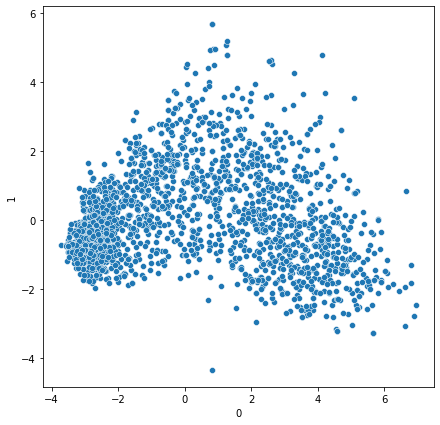

In [37]:
# Scatter plot for two components using dataframe data_pca

plt.figure(figsize = (7,7))                                      
sns.scatterplot(x = 0, y = 1, data = data_pca)

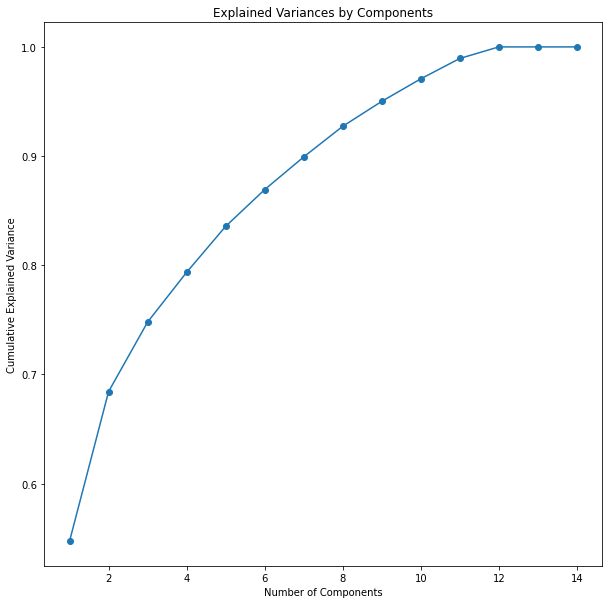

In [38]:
# Visualize the explained variance by individual components
plt.figure(figsize = (10, 10))
plt.plot(range(1, 15), exp_var.cumsum(), marker = 'o', linestyle = '-')
plt.title("Explained Variances by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.show()

In [39]:
# Finding the least number of components that can explain more than 88% variance
sum = 0

for ix, i in enumerate(exp_var):
    sum = sum + i
    if(sum>0.80):
        print("Number of PCs that explain at least 80% variance: ", ix + 1)
        break

Number of PCs that explain at least 80% variance:  5


In [40]:
# Interpret the coefficients of the first seven principal components from the below DataFrame
pc_comps = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']

data_pca.T
pc1 = pd.DataFrame(np.round(pca.components_.T[:, 0:5], 2), index = data_scaled.columns, columns = pc_comps)

In [41]:
# use the mean for the coefficient limit
coeff_limit = np.median([0.32, 0.29, 0.25, 0.29, 0.26, 0.25, 0.22, -0.02, 0.23, 0.31, 0.28, -0.22, 0.34, 0.31])
print('The coefficient limit is',coeff_limit)

def color_high(val):
    if val <= -coeff_limit:
        return 'background: pink'
    
    elif val >= coeff_limit:
        return 'background: skyblue'   
    
pc1.style.applymap(color_high)

The coefficient limit is 0.27


,PC1,PC2,PC3,PC4,PC5
Income,0.320000,-0.050000,-0.250000,-0.000000,-0.100000
MntWines,0.290000,0.160000,-0.380000,0.080000,0.320000
MntFruits,0.250000,-0.170000,0.410000,-0.290000,0.080000
MntMeatProducts,0.290000,-0.180000,-0.080000,0.000000,0.210000
MntFishProducts,0.260000,-0.190000,0.400000,-0.080000,0.030000
MntSweetProducts,0.250000,-0.160000,0.360000,-0.370000,0.010000
MntGoldProds,0.220000,0.100000,0.430000,0.810000,-0.110000
NumDealsPurchases,-0.010000,0.600000,0.200000,-0.160000,-0.390000
NumWebPurchases,0.230000,0.430000,0.040000,-0.100000,0.280000
NumCatalogPurchases,0.310000,-0.040000,-0.090000,0.160000,-0.020000


<div class="alert alert-block alert-info">
    <font size=4 color=black><b>PCA Observations and Insights:</b></font><br>
    <ul>
        <li>Using PCA, the features were reduced from 14 to 5 pricipal components</li>
        <li>The first 5 components explain 80% of the original variance</li>
        <li>Seven PCA components is a dimensionality reduction of ~64% of the dataset with only a loss of 20% variance</li>
        <li>Principal Component 1(PC1)</li>
        <ul>
            <li>Uses catalog and store channels for purchases</li>
            <li>The most accepted campaign is campaigns 1 and 5</li>
            <li>Spends the most money</li>
        </ul>
        <li>Principal Component 2(PC2)</li>
        <ul>
            <li>Takes advantage of website deals for purchases</li>
            <li>Makes the most purchases</li>
            <li>Spends the least money</li>
            <li>The most accepted campaign is campaign 4
        </ul>
        <li>Principal Component 3(PC3)</li>
        <ul>
            <li>Takes advantage of website deals for purchases</li>
            <li>Makes the most purchases</li>
            <li>Spends the least money</li>
        </ul>
    </ul>
</div>

<font size=3><b>Apply t-SNE non-linear clustering)</b></font><br><br>
t-distributed Stochastic Neighbor Embedding (t-SNE) is nonlinear dimensionality reduction algorithm allowing for the separation of data that cannot be separated by a straight line.  

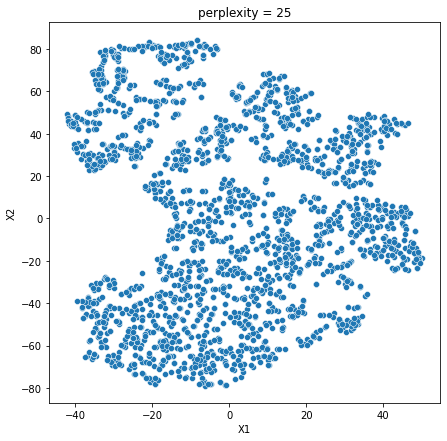

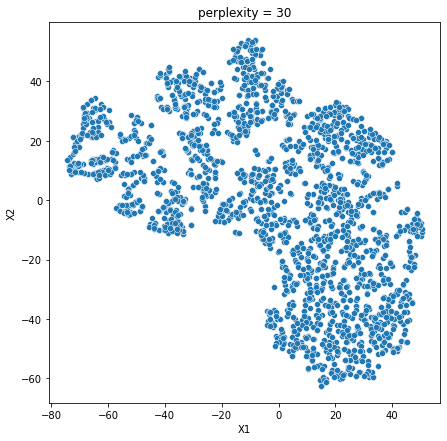

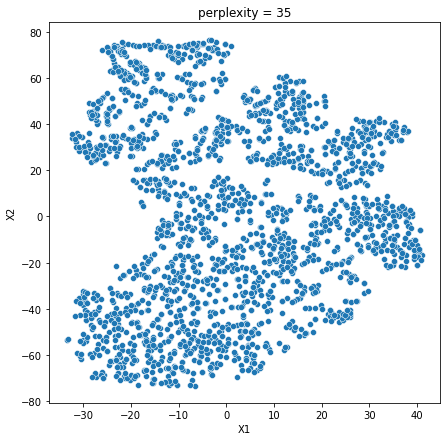

In [42]:
#Visualize the data using different perplexities

for i in range(25, 40, 5):
        
    # Initializing T-SNE with number of component equal to 2, random_state=1, and perplexity=35
    tsne = TSNE(n_components = 2, random_state = 1, perplexity = i)
    
    # fit_transform T-SNE on new data
    data_tsne = tsne.fit_transform(data_scaled)
    
    # Converting the embeddings to a dataframe
    data_tsne = pd.DataFrame(data_tsne)
    
    # Scatter plot for two components
    data_tsne.columns = ['X1', 'X2']
    plt.figure(figsize = (7,7))
    sns.scatterplot(x = 'X1', y = 'X2', data = data_tsne)
    plt.title("perplexity = {}".format(i))

<div class="alert alert-block alert-info">
    <font size=4 color=black><b>t-SNE Observations and Insights:</b></font><br>
    <ul>
        <li>There are some clusters that appear to be forming.</li>
        <li>With the perplexity set at 25 a visible cluster appears at the top left of the plot</li>
    </ul>
</div>

<font size=3><b>Apply K-Means</b></font><br><br>
K-means clustering is one of the most widely used methods, unlike PCA and T-SNE, K-Means can be used for both linear and non-linear use cases. It uses randomly selected data points provided as the k value. Think of these data points as the center of a cluster. If the k value is three, then three randomly selected data points will represent the center of three distinct groups. The distance between all the remaining data points and the center points is measured, with each data point getting assigned to the closest cluster. The distance can be measured (linear) or calculated (non-linear). The Euclidian distance is used to measure the distance between the data points and the selected center of each cluster in non-linear use cases. After assigning each data point to a cluster, there will be k clusters or groups of data points. The K-means algorithm checks each cluster's quality by calculating the mean of all the values and measuring the variance of the mean value to the previously selected cluster centers. This process repeats if the variance is high until the clusters no longer change. At the end of this process, the K-means algorithm uses the clusters with the least variance.

<font size=3><b>Initialize K-Means</b></font>

In [43]:
# Create an empty list
distortions = []

# Setting the K range from 2 to 10
K = range(2, 10)

for k in K:
    # Initialize K-Means
    kmeanModel = KMeans(n_clusters=k,random_state=4)
    
    # Fit K-Means on the data
    kmeanModel.fit(data_pca)
    
    # Append distortion values to the empty list created above
    distortions.append(kmeanModel.inertia_)

<font size=3><b>Identify the best value for k</b></font><br><br>
The best way to determine the value of k is by plotting the reduction variance per value for k. Larger reductions can be identified to provide the optimal number for k.

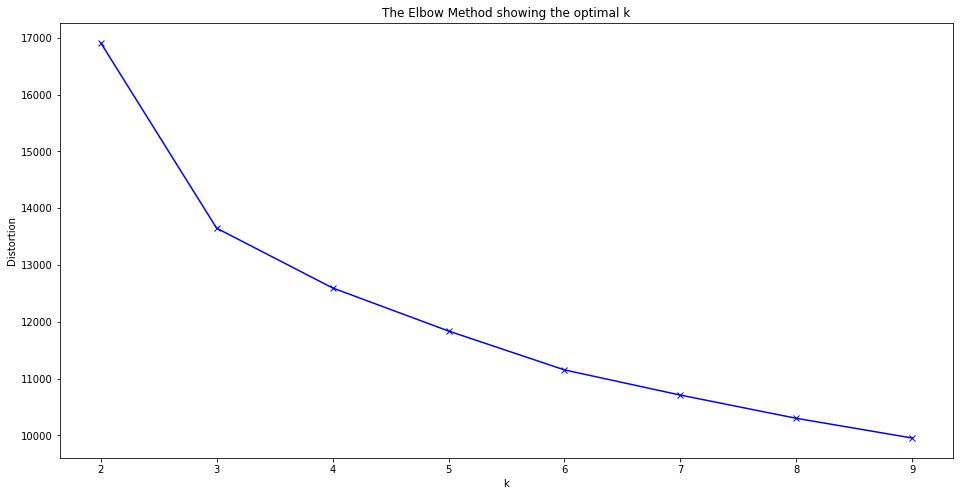

In [44]:
# Setting the plot size
plt.figure(figsize=(16, 8))

# Plotting the K on X-axis and distortions on y-axis
plt.plot(K, distortions, "bx-")

 # Title of x-axis
plt.xlabel("k")

# Title of y-axis
plt.ylabel("Distortion")

# Title of the plot
plt.title("The Elbow Method showing the optimal k")
plt.show()

<font size=3><b>Apply K-Means to the data_pca</b></font>

In [45]:
# Fit data_pca to K-Means
kmeans = KMeans(n_clusters=3,random_state=1)
kmeans.fit(data_pca)

KMeans(n_clusters=3, random_state=1)

In [46]:
# Adding K-Means cluster labels to the data_pca data
data_pca['K_means_segments_3'] = kmeans.labels_

In [47]:
# Function to visualize PCA data with clusters formed
def PCA_PLOT(X, Y, PCA, cluster):
    sns.scatterplot(x=X, y=1, data=PCA, hue=cluster)

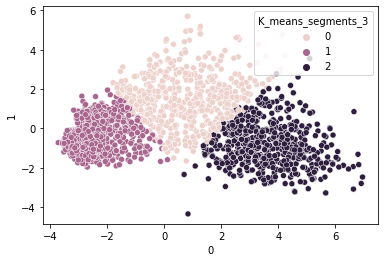

In [48]:
PCA_PLOT(0, 1, data_pca, 'K_means_segments_3')

<div class="alert alert-block alert-info">
    <font size=4 color=black><b>K-Means Observations and Insights:</b></font><br><br>
    The following insights are from both the coefficient chart and Kmeans, both used the PCA dataset.<br><br>
    <b>Group 0 characteristics and behaviors</b>
    <ul>
        <li>Income is higher than all the segments</li>
        <li>Spend the most money of the three segments</li>
        <li>Visit the website the least of all three segments</li>
        <li>Most items are purchased using the catalog channel</li>
        <li>Both catalogs and stores are used most frequently</li>
        <li>Deals and the website are channels used the least in this group</li>
    </ul><br>
     <b>Group 1 characteristics and behaviors</b>
    <ul>
        <li>They purchase more items than any other group</li>
        <li>Deals are the most used channel which may explain why this group purchases more, but spends less that group 0</li>
        <li>The website is the preferred channel of making purchases which is driven by deals</li>
        <li>Purchase wine and gold the most often</li>
    </ul><br>
     <b>Group 2 characteristics and behaviors</b>
    <ul>
        <li>Spend and purchase the least of the groups</li>
        <li>They used deals the most of any group</li>
        <li>They use the website to make purchases</li>
        <li>Purchase gold and fruit the most, but also purchase fish and sweets</li>
        <li>Wine is purchased the least of the groups</li>
    </ul>
</div>

<font size=3><b>Apply K-Medoid on data_pca</b></font><br><br>
Earlier in the notebook there were some outliers removed, however, outliers still exist for many observations. The K-Means method is sensitive to outliers because it uses the mean of a cluster as the center point of reference for the cluster. K-Mediods is another method to cluster the data and it is <b>not sensitive to outliers</b> because the algorithm uses a random point in the cluster and calculates the some of the squares error (SSE). The algorith continues to enumerate the cluster and the point with the lowest SSE becomes the central point of the cluster. The difference between K-Means and K-Medoids is using a mean vs an actual data point as the center reference point of a cluster.

In [49]:
# Apply the K-Medoids algorithm on the pca components with n_components=3 and random_state=1
kmedo = KMedoids(n_clusters=3, random_state=1)

# Fit the model on the pca components
kmedo.fit(data_pca)

data['Kmedo_Labels'] = kmedo.predict(data_pca)

# Number of observations in each cluster
data.Kmedo_Labels.value_counts()

0    968
1    713
2    472
Name: Kmedo_Labels, dtype: int64

In [50]:
# Calculating summary statistics of the original data for each label
original_features = ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

mean = data.groupby('Kmedo_Labels').mean()
median = data.groupby('Kmedo_Labels').median()
data_kmedoids = pd.concat([mean, median], axis = 0)
data_kmedoids.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']
data_kmedoids[original_features].T

,group_0 Mean,group_1 Mean,group_2 Mean,group_0 Median,group_1 Median,group_2 Median
Income,34443.448347,72695.422160,53188.148305,34221.5,72460.0,53775.5
MntWines,35.177686,583.157083,374.078390,19.0,543.0,297.0
MntFruits,4.672521,61.872370,13.972458,2.0,48.0,8.0
MntMeatProducts,21.407025,383.570827,100.044492,14.0,350.0,86.0
MntFishProducts,6.900826,87.333801,19.364407,3.0,72.0,11.5
MntGoldProds,14.110537,74.422160,50.690678,9.0,56.0,36.0
NumDealsPurchases,1.855372,1.687237,4.161017,2.0,1.0,4.0
NumWebPurchases,1.945248,5.511921,6.038136,2.0,5.0,6.0
NumCatalogPurchases,0.504132,5.454418,2.300847,0.0,5.0,2.0
NumStorePurchases,3.175620,8.821879,6.565678,3.0,9.0,6.0


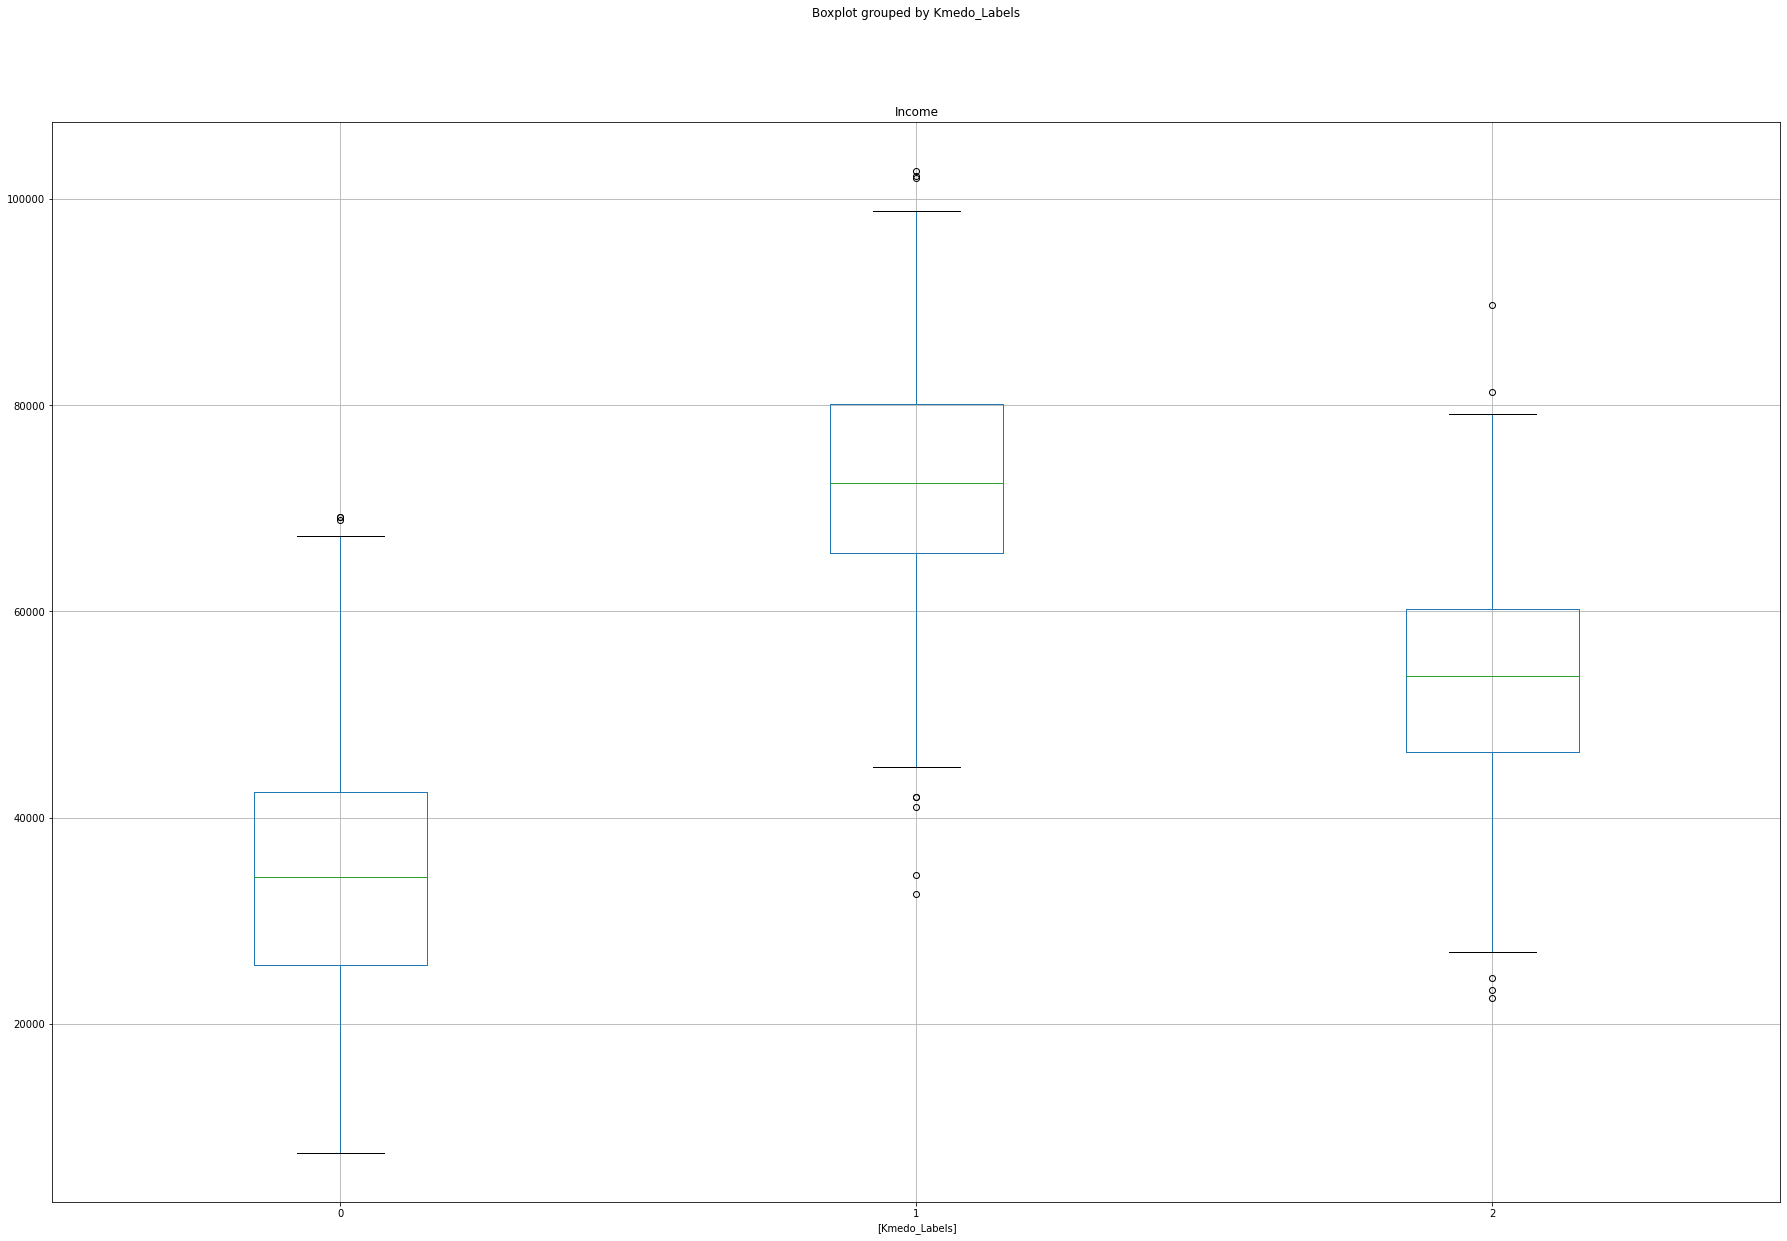

In [51]:
# Plotting boxplot with the new K-Medoids based labels on Income

features_with_lables = ['Income', 'Kmedo_Labels']
data[features_with_lables].boxplot(by = 'Kmedo_Labels', layout = (1, 1), figsize = (30, 20))
plt.show()

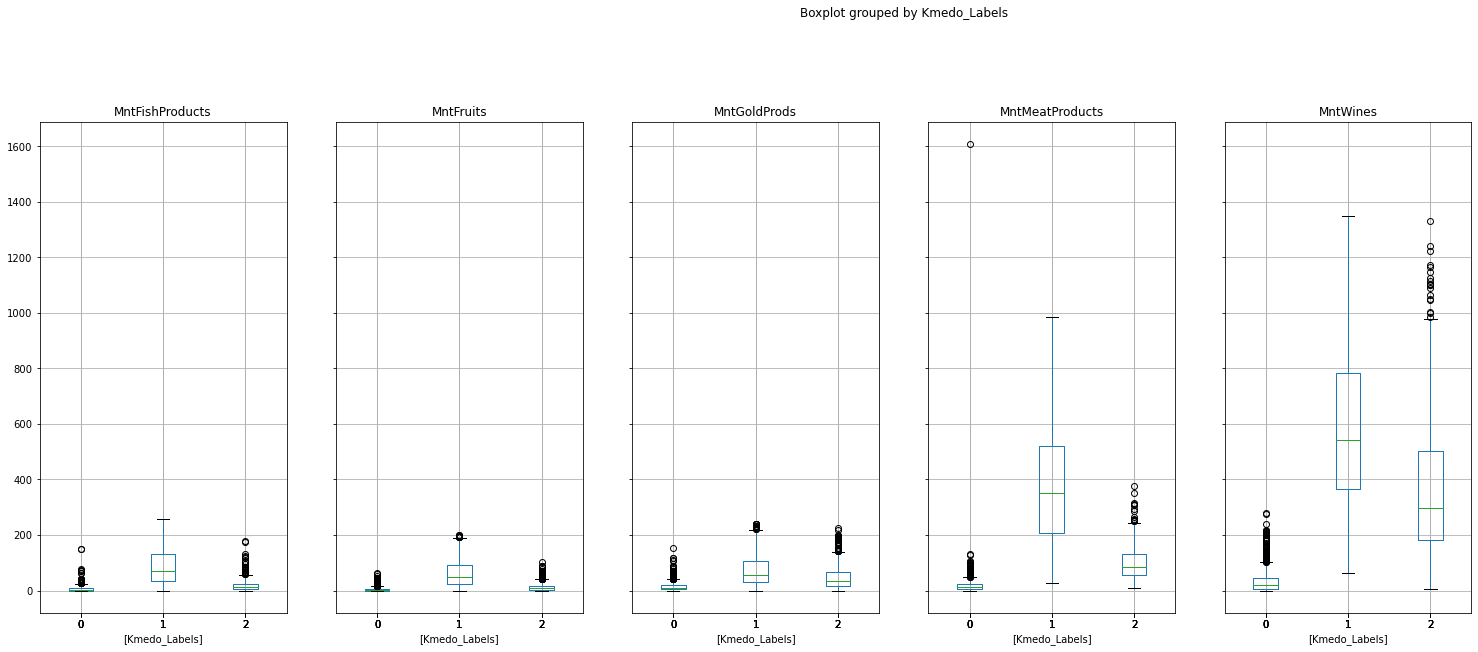

In [52]:
# Plotting boxplots with the new K-Medoids based labels for products

features_with_lables = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntGoldProds', 'Kmedo_Labels']
data[features_with_lables].boxplot(by = 'Kmedo_Labels', layout = (2, 6), figsize = (30, 20))
plt.show()

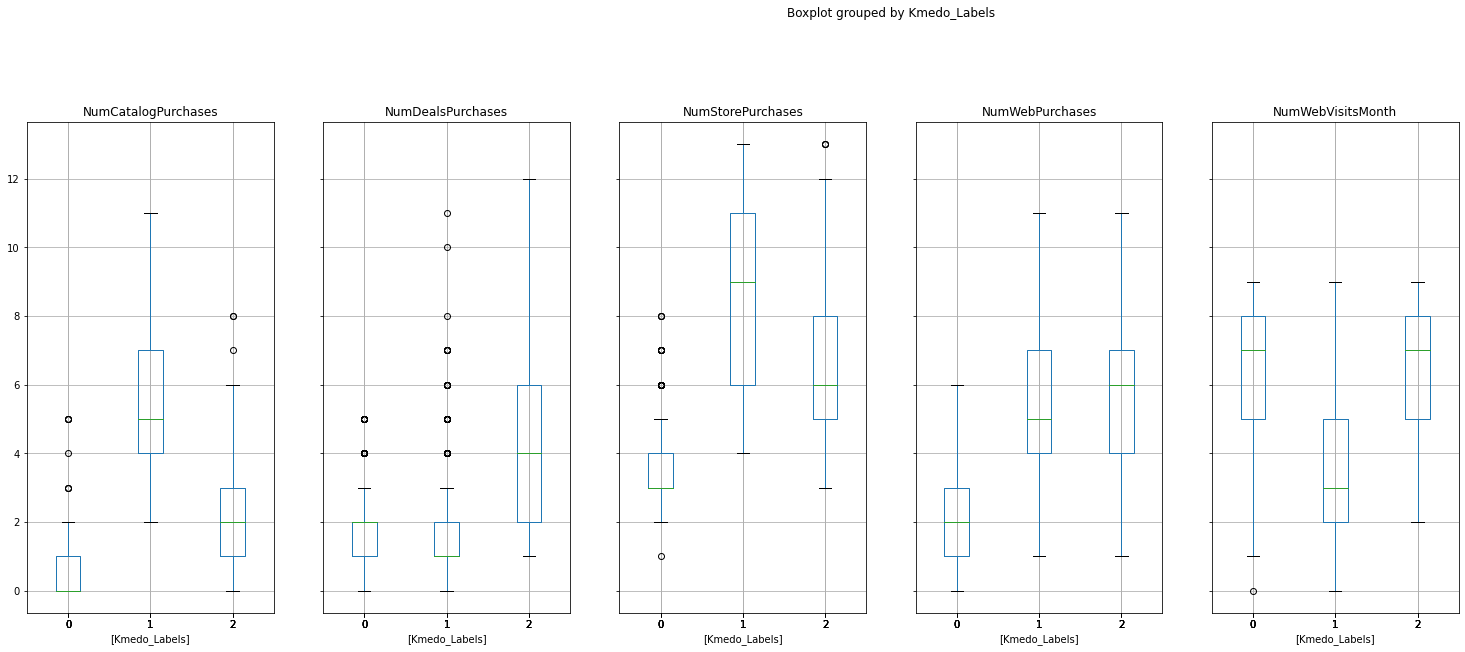

In [53]:
# Plotting boxplots with the new K-Medoids based labels for channels

features_with_lables = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Kmedo_Labels']
data[features_with_lables].boxplot(by = 'Kmedo_Labels', layout = (2, 6), figsize = (30, 20))
plt.show()

<div class="alert alert-block alert-info">
    <font size=4 color=black><b>K-Mediods Observations and Insights:</b></font><br><br>
    <b>Group 0 Profile</b>
    <ul>
        <li>Has the highest average income</li>
        <li>Meat and wine are the favorite products to purchase, although there is a high about of variance in both</li>
        <li>Purchase wine more than any other group
        <li>This group prefers purchasing in stores, however will use both a catalog and website as well</li>
        <li>Likely to respond to campaign 4 most often, and campaign 1</li>
    </ul><br>
     <b>Group 1 Profile</b>
    <ul>
        <li>Has the lowest average income</li>
        <li>Meat and wine are the favorite products to purchase</li>
        <li>The website is the preferred channel of making purchases followed by visits to stores</li>
    </ul><br>
     <b>Group 2 Profile</b>
    <ul>
        <li>Incomes are closer to the average, the middle between Group 0 and Group 1</li>
        <li>Prefer Wine, Meat, and Gold products</li>
        <li>They use the stores and websites equally followed by catalogs to make purchases</li>
        <li>Responds the best to deals
    </ul>
</div>

---
<font size=5 color="#483D8B"><b>Conclusion</b></font>
***

<font size=4 color="#6A5ACD"><b>Proposed Model</b></font><br><br>
The purposed model is the K-Medoid method for customer profiling. While the K-Means method is a widely used method, it is sensitive to outliers. The observed Marketing data has a high-amount of outliers that could impact insights due to K-Means use of the mean for calculating the center of a cluster. The K-Medoid method is not impacted by outliers.

<font size=4 color="#6A5ACD"><b>Marketing Campaign Recommendations</b></font><br><br>
<ol>
    <li>The details and content of the campaigns was not included in the dataset. The data suggests that Campaign 4 performed well across all incomes, three channels, targeting wine. I recommend reviewing that campaign content and create new campaigns for other products, such as meat, fish, and gold.</li>
    <li>Capture additional data around customer health habits and reapply the model above. There may be additonal insight suggesting bundles of health products, such as fish.</li>
    <li>Sweets are generally purchased around holidays, there were only five campaigns in the data and there are at least five US holidays (alone) where sweets are popular. Holiday campaigns around sweets is recommended.</li>
    <li>Now that we're aware wine is a popular product, market research around what wine is good with different kinds of meat and fish. It is suggested that the website incorporates a recommendation system if it hasn't already. If there is a recommendation system, it is recommended to review its configuration and performance based on the customer insights provided in this data science notebook</li>
    <li>The data suggests that none of the current marketing campaigns are attracting new customers. It appears that once customers have purchased, they continue to purchase. It is recommended that a review of advertising channels to increase traffic to the website, fifty percent of users visiting the website purchase a product</li>
    <li>Customer aren't seeing enough value in products, their purchase generally are less that $250. It is recommended that a review of product messaging</li>

<font size=4 color="#6A5ACD"><b>Measures of Success</b></font><br><br>
<ul>
    <li>Implement new campaigns and messaging comparing the numbers to previous campaign data looking for the following observations:
        <ul>
            <li>Increases in product acceptance</li>
            <li>Increases is customer spending and product purchases</li>
            <li>Increase in purchases across all incomes</li>
            <li>Higher average spending per purchasing event</li>
        </ul>
    <li>Higher marketing-to-sales conversion rates</li>
    <li>Increase in revenue</li>
</ul>